In [4]:
!pip install xgboost==1.5.0

Defaulting to user installation because normal site-packages is not writeable


In [5]:
import xgboost as xgb
from xgboost import XGBClassifier

In [7]:
import xgboost
print(xgboost.__version__)

1.5.0


In [3]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
dataset = load_breast_cancer()
features= dataset.data
labels = dataset.target

In [5]:
cancer_df = pd.DataFrame(data=features, columns=dataset.feature_names)
cancer_df['target']= labels
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [6]:
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [7]:
X_features = cancer_df.iloc[:, :-1 ]
y_label = cancer_df.iloc[:, -1 ]

In [8]:
X_train, X_test, y_train, y_test=train_test_split(X_features, y_label, test_size=0.2,
random_state=156)

In [9]:
X_tr, X_val, y_tr, y_val= train_test_split(X_train, y_train, test_size=0.1, random_state=156 )

print(X_train.shape, X_test.shape)
print(X_tr.shape, X_val.shape)

(455, 30) (114, 30)
(409, 30) (46, 30)


In [10]:
dtr = xgb.DMatrix(data=X_tr, label=y_tr)
dval = xgb. DMatrix(data=X_val, label=y_val)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [11]:
params = {'max.depth': 3,
          'eta': 0.05,
          'objective':'binary:logistic',
          'eval_metric':'logloss'
}
num_rounds = 400

In [12]:
eval_list = [(dtr,'train'),(dval,'eval')]

In [13]:
xgb_model = xgb.train(params = params , dtrain=dtr , num_boost_round=num_rounds , \
early_stopping_rounds=50, evals=eval_list )

[15:26:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:576: 
Parameters: { "max.depth" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	train-logloss:0.64995	eval-logloss:0.66107
[1]	train-logloss:0.61090	eval-logloss:0.63423
[2]	train-logloss:0.57446	eval-logloss:0.61012
[3]	train-logloss:0.54177	eval-logloss:0.58792
[4]	train-logloss:0.51097	eval-logloss:0.56746
[5]	train-logloss:0.48299	eval-logloss:0.55053
[6]	train-logloss:0.45605	eval-logloss:0.52901
[7]	train-logloss:0.43210	eval-logloss:0.51510
[8]	train-logloss:0.40887	eval-logloss:0.49657
[9]	train-logloss:0.38729	eval-logloss:0.47984
[10]	train-logloss:0.36783	eval-logloss:0.46795
[11]	train-logloss:0.34903	eval-logloss:0.45342
[12]	train-loglo

In [15]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

predict( ) 수행 결괏값을 10개만 표시, 예측 확률 값으로 표시됨
[0.878 0.007 0.744 0.129 0.985 0.998 0.998 0.997 0.997 0.002]


In [16]:
# 예측 확률이 0.5보다 크면 1 , 그렇지 않으면 0으로 예측값 결정하여 List 객체인 preds에 저장
preds = [1 if x > 0.5 else 0 for x in pred_probs]
print('예측값 10개만 표시:',preds[:10])

예측값 10개만 표시: [1, 0, 1, 0, 1, 1, 1, 1, 1, 0]


In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    acc = accuracy_score(y_test, pred)
    prec = precision_score(y_test, pred, average='binary')   
    rec = recall_score(y_test, pred, average='binary')
    f1 = f1_score(y_test, pred, average='binary')
    
    if pred_proba is not None:
        auc = roc_auc_score(y_test, pred_proba)
        print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 ： {3:.4f}, AUC：{4:.4f}".format(acc, prec, rec, f1, auc))
    else:
        print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1 ： {3:.4f}".format(acc, prec, rec, f1))

    print("오차 행렬")
    print(confusion_matrix(y_test, pred))

    
get_clf_eval(y_test, preds, pred_probs)

정확도: 0.9474, 정밀도: 0.9610, 재현율: 0.9610, F1 ： 0.9610, AUC：0.9916
오차 행렬
[[34  3]
 [ 3 74]]


In [20]:
import matplotlib.pyplot as pit
%matplotlib inline

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

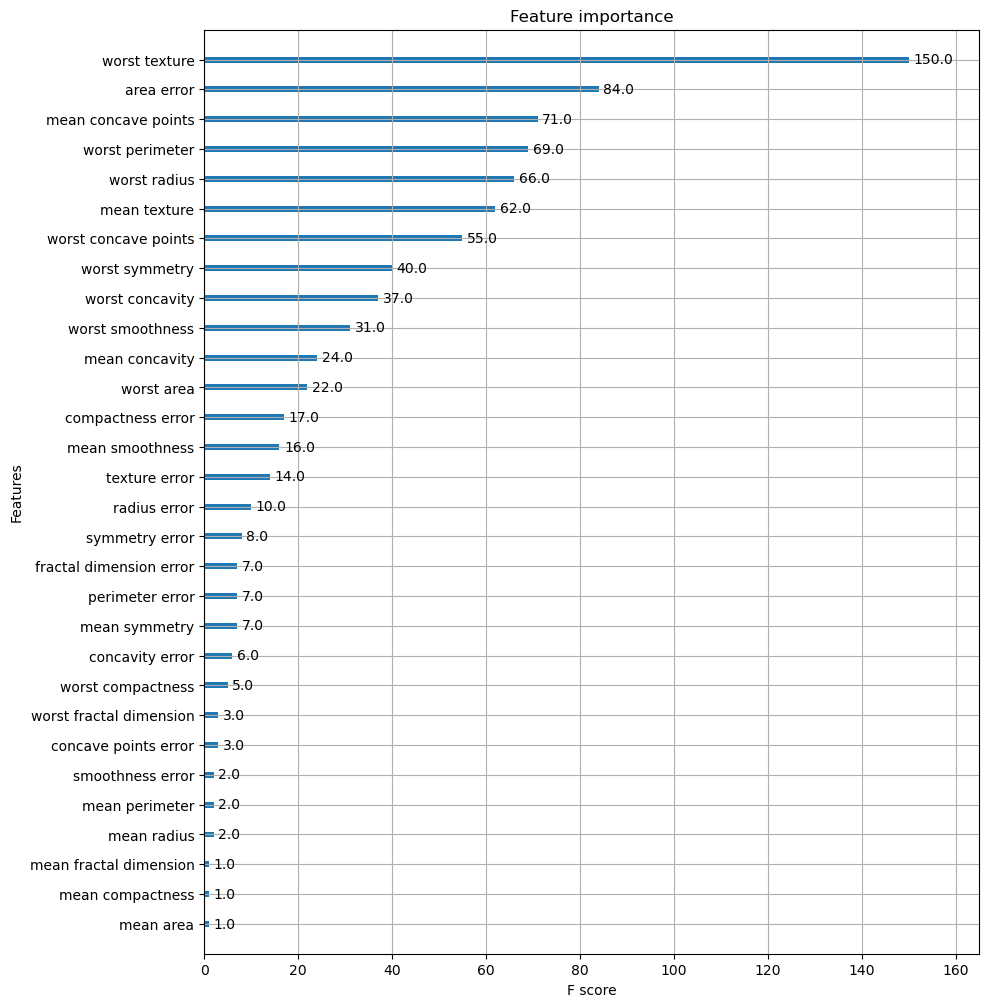

In [21]:
fig, ax = pit.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)

In [22]:
from xgboost import XGBClassifier

In [24]:
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3,
eval_metric='logloss')
xgb_wrapper.fit(X_train, y_train, verbose=True)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]

In [25]:
get_clf_eval(y_test, w_preds, w_pred_proba)

정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1 ： 0.9744, AUC：0.9954
오차 행렬
[[34  3]
 [ 1 76]]


In [26]:
from xgboost import XGBClassifier

xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3)
evals = [(X_tr, y_tr), (X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss',
eval_set=evals, verbose=True)

ws50_preds = xgb_wrapper.predict(X_test)
ws50_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

In [27]:
get_clf_eval(y_test, ws50_preds, ws50_pred_proba)

정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1 ： 0.9677, AUC：0.9933
오차 행렬
[[34  3]
 [ 2 75]]


In [28]:
xgb_wrapper.fit(X_tr, y_tr, early_stopping_rounds=10,
                eval_metric='logloss', eval_set=evals, verbose=True)

ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

[0]	validation_0-logloss:0.65016	validation_1-logloss:0.66183
[1]	validation_0-logloss:0.61131	validation_1-logloss:0.63609
[2]	validation_0-logloss:0.57563	validation_1-logloss:0.61144
[3]	validation_0-logloss:0.54310	validation_1-logloss:0.59204
[4]	validation_0-logloss:0.51323	validation_1-logloss:0.57329
[5]	validation_0-logloss:0.48447	validation_1-logloss:0.55037
[6]	validation_0-logloss:0.45796	validation_1-logloss:0.52929
[7]	validation_0-logloss:0.43436	validation_1-logloss:0.51534
[8]	validation_0-logloss:0.41150	validation_1-logloss:0.49718
[9]	validation_0-logloss:0.39027	validation_1-logloss:0.48154
[10]	validation_0-logloss:0.37128	validation_1-logloss:0.46990
[11]	validation_0-logloss:0.35254	validation_1-logloss:0.45474
[12]	validation_0-logloss:0.33528	validation_1-logloss:0.44229
[13]	validation_0-logloss:0.31893	validation_1-logloss:0.42961
[14]	validation_0-logloss:0.30439	validation_1-logloss:0.42065
[15]	validation_0-logloss:0.29000	validation_1-logloss:0.40958
[1

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

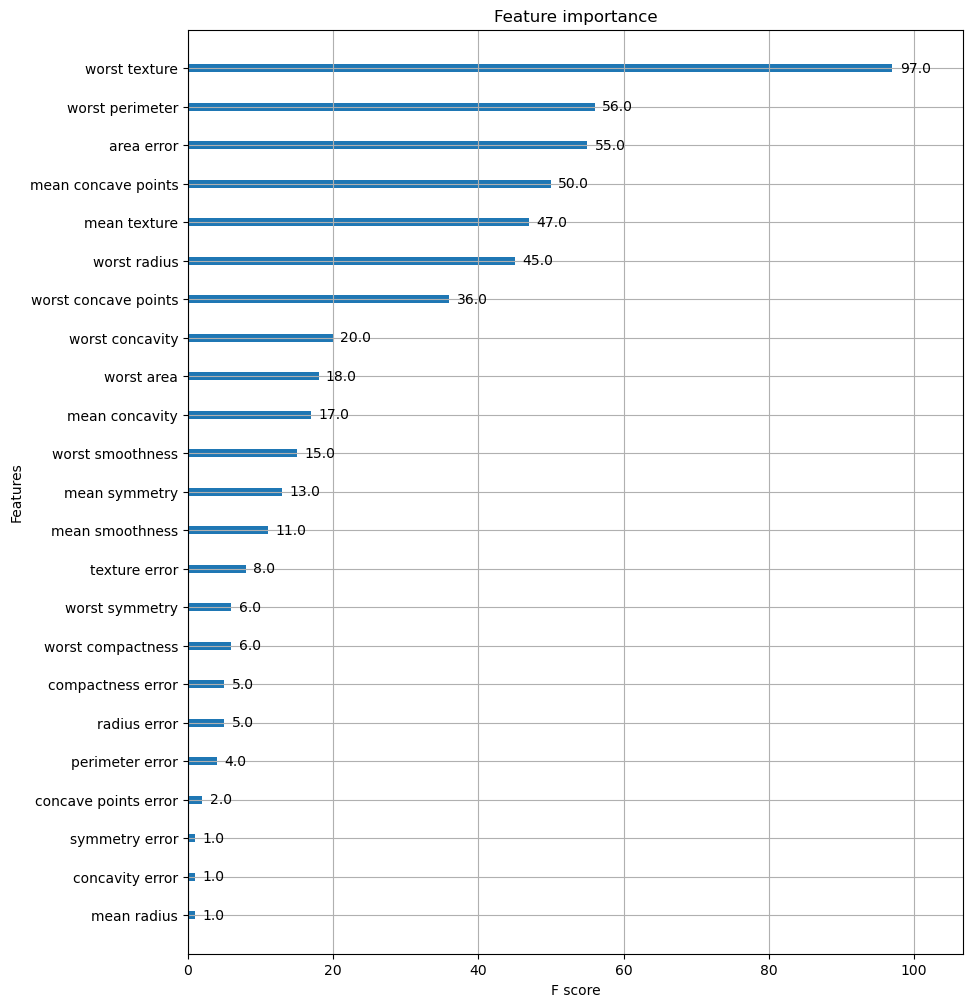

In [29]:
from xgboost import plot_importance
import matplotlib.pyplot as pit
%matplotlib inline
fig, ax = pit.subplots(figsize=(10, 12))

plot_importance(xgb_wrapper, ax=ax)